   ***Diego Benavides
     Experimental Methods in Astronomy:
     Radio-telescope Data of Hydrogen 21[centimeter] wavelength photon counts***

The following data being analized was acquired during a lab session of my Experimental Methods of Astronomy course (AST4700)

In [1]:
import numpy as np
import scipy.constants as const
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

**Calculating the Rayleigh Criterion:**

In [2]:
#Determining the Rayleigh Criterion Resolution of the Radio-Telescope:

from my_astro_func import rayleigh_crit_degrees #function is on a separate file, included in this folder

wav_len = 0.2111 #[meters]
tele_D = 1 #[meters]

tele_RC = rayleigh_crit_degrees(wav_len,tele_D)

#print(f'Rayleigh Criterion Function Docstring :\n{rayleigh_crit_degrees.__doc__}')
print(f'\nRayleigh Criterion is {tele_RC} degrees.\nThis is very coarse.')


Rayleigh Criterion is 14.756069647358247 degrees.
This is very coarse.


**Calculating the rate of Earth's spin:**

In [3]:
sidereal_day_in_minutes = ( 23 * 60 ) + ( 56 ) + ( 3.1 / 60) 
degree_per_minute = 360/sidereal_day_in_minutes
print(f'In 2 minutes {degree_per_minute*2} degrees were spun through in the sky. {degree_per_minute*2} < {tele_RC}.')

In 2 minutes 0.501374718411942 degrees were spun through in the sky. 0.501374718411942 < 14.756069647358247.


**Plotting the Photon Counts as a function of Frequency(radio_plot1 in the files):**

In [4]:
#reformatting the data:
rt_data = pd.read_csv('Lab5_data.txt', delimiter=' ')

rt_data_formatted = pd.DataFrame(rt_data)

#print(rt_data_formatted.shape)
x = rt_data_formatted.iloc[0:,0]
y = rt_data_formatted.iloc[0:,2]
plt.style.use('dark_background')

**plot of spectra:**

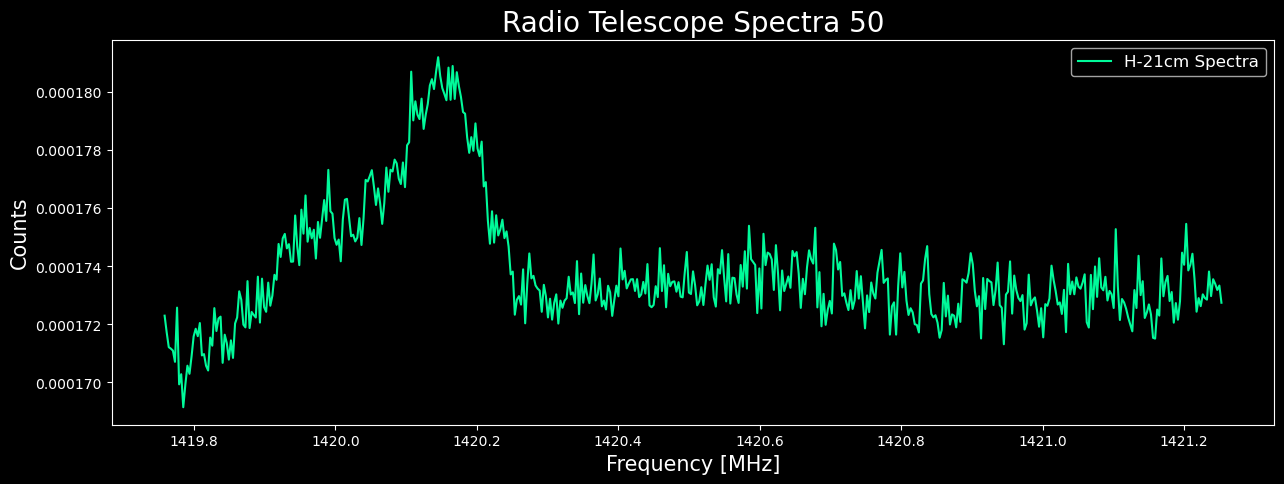

In [5]:
plt.figure(figsize=(15,5))
plt.style.use('dark_background')
plt.plot(x,y, linestyle = '-', color = 'mediumspringgreen',label = 'H-21cm Spectra')
plt.xlabel('Frequency [MHz]', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.title('Radio Telescope Spectra 50', fontsize = 20)
plt.legend(fontsize=12)
plt.show()

**Calculating maximum and minimum frequency, and bandwidth:**

In [6]:
x_min = np.min(x)
x_max = np.max(x)
print(f'Maximum Frequency is {x_max} MHz\nMinimum Frequency is {x_min} MHz')

dv = x_max-x_min

print(f'Bandwidth is {dv} MHz')

Maximum Frequency is 1421.252770313 MHz
Minimum Frequency is 1419.758629688 MHz
Bandwidth is 1.494140625 MHz


**Bin count**

In [7]:
print(f'There are {len(x)} frequency bins in the data file.')

There are 511 frequency bins in the data file.


**Calculating the resolution of the spectrum at the H-21cm transition:**

In [8]:
transition_freq = 1420.40575177 * (np.power(10,6)) #in Hz
del_v = 2929.6875 #in Hz

resolution_at_hyperfine = transition_freq/del_v

print(f'The resolution of the spectrum at the hyperfine transition’s frequency is {resolution_at_hyperfine}')

The resolution of the spectrum at the hyperfine transition’s frequency is 484831.8299374933


**Plotting Photon counts as a function of Radial Velocity(radio_plot2 in the files):**

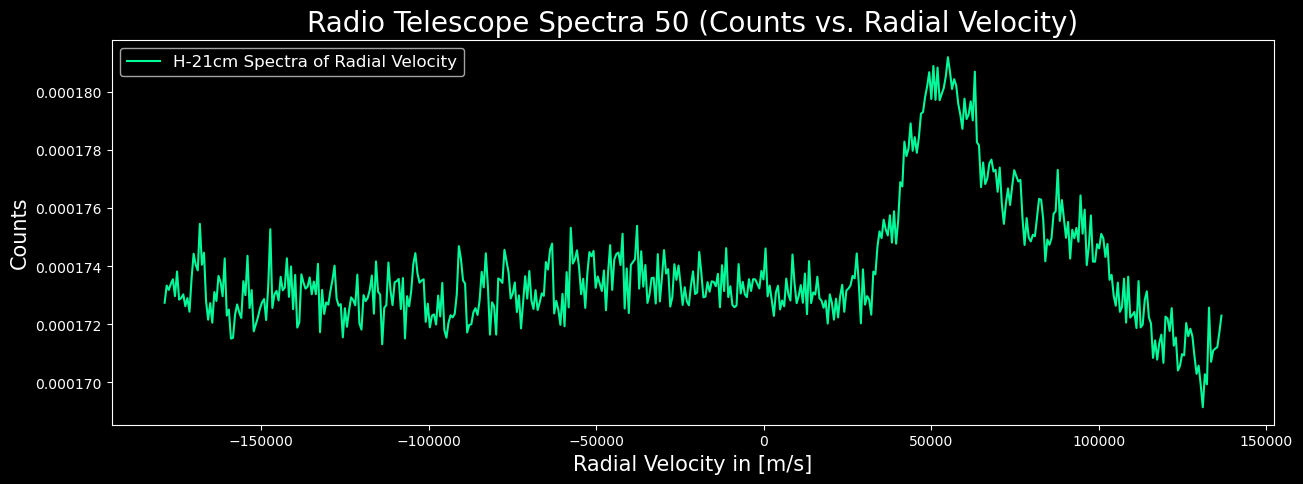

In [9]:
transition_freq_MHz = 1420.40575177

radial_v = (const.c*(transition_freq_MHz-x))/transition_freq_MHz

plt.style.use('dark_background')
plt.figure(figsize=(15,5))
plt.plot(radial_v,y, linestyle = '-', color = 'mediumspringgreen',label = 'H-21cm Spectra of Radial Velocity')
plt.xlabel('Radial Velocity in [m/s]', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.title('Radio Telescope Spectra 50 (Counts vs. Radial Velocity)', fontsize = 20)
plt.legend(fontsize=12)
plt.show()

**Radial Velocity at the peak:**

In [10]:
radial_v_at_peak= radial_v.iloc[np.where(y==np.max(y))]
print(f'The radial velocity at the peak of the spectra is {radial_v_at_peak.values[0]} m/s') #The pandas series is indexed at 0 because the series only has one value and I didn't want the brackets in the print statement.
#print(radial_v_at_peak)

The radial velocity at the peak of the spectra is 54961.024252701085 m/s


**Calculating the Integrated Flux (radio_plot3 in the files):**

**First step would be to remove the background noise (the atmosphere) by fitting a model to it and subtracting it:**

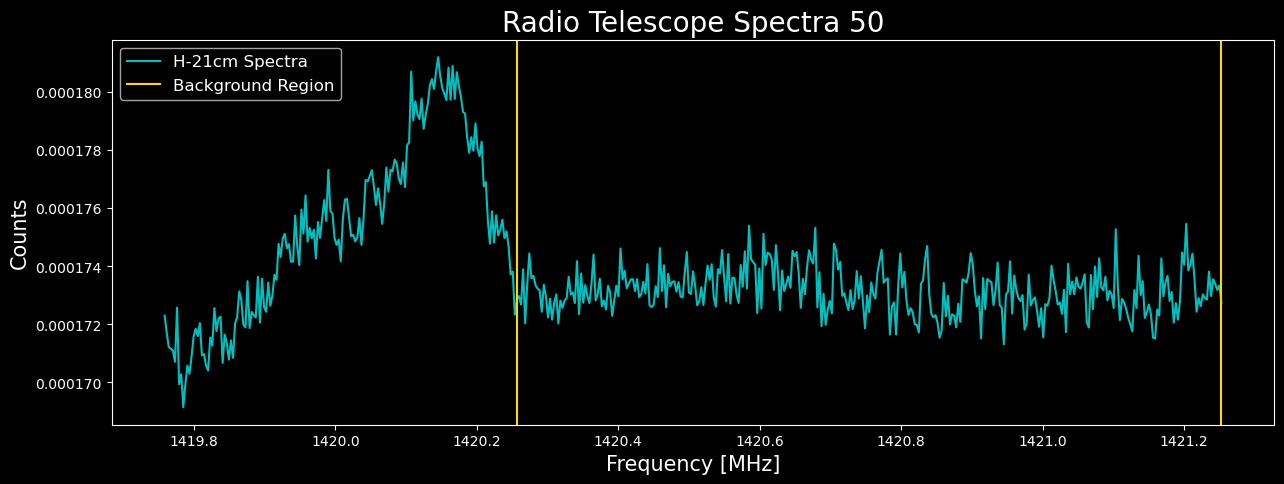

In [11]:
#Determining the background range graphically

plt.style.use('dark_background')
plt.figure(figsize=(15,5))
plt.plot(x,y, linestyle = '-', color = 'c',label = 'H-21cm Spectra')
plt.axvline(x.iloc[170], color = 'gold',label = 'Background Region')
plt.axvline(x.iloc[510], color = 'gold')
plt.xlabel('Frequency [MHz]', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.title('Radio Telescope Spectra 50', fontsize = 20)
plt.legend(fontsize=12)
plt.show()

**Modeling the data and plotting the model(radio_plot4 in the files):**

The fitted polynomial is:
           3           2
1.066e-05 x - 0.04544 x + 64.56 x - 3.057e+04


Coefficients of polynomial are:
[ 1.06606212e-05 -4.54389230e-02  6.45583289e+01 -3.05742111e+04]



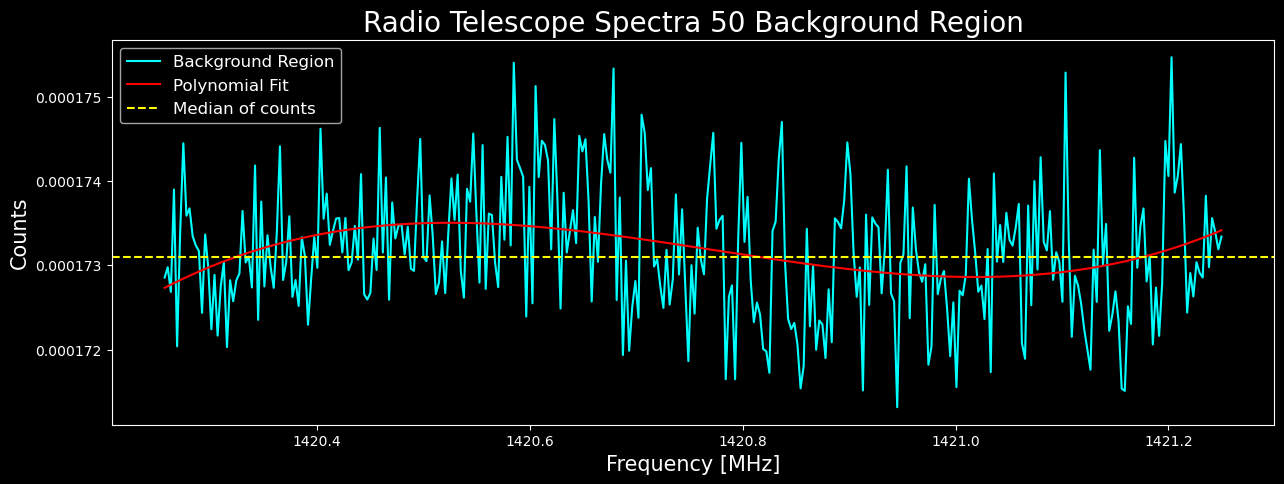

In [12]:
#creating the axes of background region
x_bg = x.iloc[170:510]
y_bg= y.iloc[170:510]


#fitting polynomial
from my_astro_func import my_data_mod
from my_astro_func import my_data_mod_eq
from my_astro_func import my_data_mod_coeff
#these two functions are on the same .py file included in the folder submitted with the assignment.

y_fit = my_data_mod(x_bg,y_bg,3)
y_fit_eq = my_data_mod_eq(x_bg,y_bg,3)
y_fit_coeff = my_data_mod_coeff(x_bg,y_bg,3)

#plotting the background region
plt.style.use('dark_background')
plt.figure(figsize=(15,5))
plt.plot(x_bg,y_bg, linestyle = '-',color = 'cyan',label='Background Region')
plt.plot(x_bg,y_fit,linestyle = '-', color ='red', label = 'Polynomial Fit')
plt.axhline(np.median(y_bg), linestyle = '--',color = 'yellow', label = 'Median of counts')
plt.xlabel('Frequency [MHz]', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.title('Radio Telescope Spectra 50 Background Region', fontsize = 20)


print(f'The fitted polynomial is:\n{y_fit_eq}')
print('\n')
print(f'Coefficients of polynomial are:\n{y_fit_coeff}\n')
plt.legend(fontsize =12)
plt.show()



**Subtracting the background and calculating the integrated flux and plotting the integrated region (radio_plot5 in the files):**

In [13]:
#Subtracting the Background Signal from the data.

def fitted_polynomial(x_func):
    y_func = ( (1.06606212e-5)*(x_func**3) ) - ( 4.54389230e-2*(x_func**2) ) + ( 6.45583289e1*(x_func) ) - (3.05742111e4)
    return y_func

background_subtracted = np.zeros(511)
background_subtracted_i = 0

for i in range(len(y)):
    
    background_subtracted_i = y[i] - fitted_polynomial(x[i])
    
    background_subtracted[i] = background_subtracted_i
    
a = np.copy(background_subtracted)

The Integrated flux is -6.368023930491628e-05


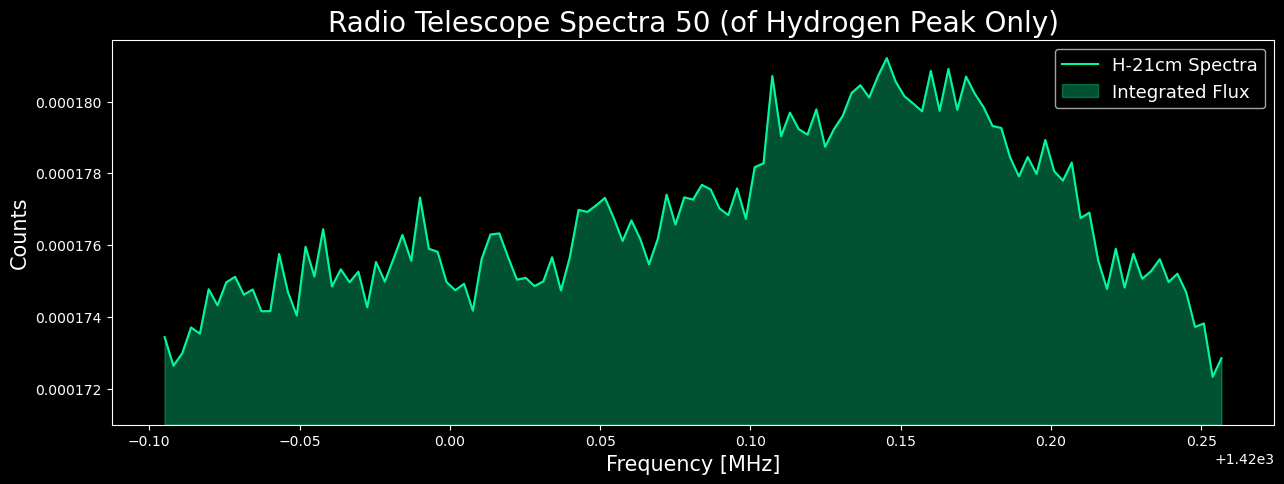

In [14]:
#Integrated Flux of the Hydrogen Peak
hydrogen_v = x[50:171] 
hydrogen_counts = a[50:171]

full_sum = 0

for i in range(len(hydrogen_v)):
    full_sum = full_sum + ((del_v/np.power(10,6))*hydrogen_counts[i])   
    
print(f'The Integrated flux is {full_sum}')


#Plotting the Hydrogen Peaks and Shading the Integration
plt.style.use('dark_background')
fig , ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
plt.rcParams["figure.autolayout"] = True
plt.rcParams['figure.autolayout'] = True
ax.plot(x[50:171],y[50:171],linestyle = '-', color = 'mediumspringgreen',label = 'H-21cm Spectra')
ax.fill_between(x[50:171],y[50:171],0.000171, color='mediumspringgreen', alpha=0.33, label = 'Integrated Flux')
plt.ylim(0.000171)
plt.xlabel('Frequency [MHz]', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.title('Radio Telescope Spectra 50 (of Hydrogen Peak Only)', fontsize = 20)
plt.legend(fontsize=13)
plt.show()
